In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [22]:
train = pd.read_csv(r"..\Data\01_raw\train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [23]:
train.shape

(3000888, 6)

In [24]:
output = []

for column in train.columns:

    null_values  = np.sum(pd.isna(train[column]))
    unique = train[column].nunique()
    column_data_type = train[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = train.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
id,0,3000888,int64,3000888.0,1.500444e+06,866281.891642,0.0,750221.75,1500443.5,2.250665e+06,3000887.0
date,0,1684,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_nbr,0,54,int64,3000888.0,2.750000e+01,15.585787,1.0,14.00,27.5,4.100000e+01,54.0
family,0,33,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sales,0,379610,float64,3000888.0,3.577757e+02,1101.997721,0.0,0.00,11.0,1.958473e+02,124717.0
onpromotion,0,362,int64,3000888.0,2.602770e+00,12.218882,0.0,0.00,0.0,0.000000e+00,741.0


In [25]:
train.drop_duplicates(inplace=True)

In [26]:
train.shape

(3000888, 6)

In [36]:
family = train.groupby(['date','store_nbr'])['sales'].sum().to_frame()
family

sales
date       store_nbr              
2013-01-01 1              0.000000
           2              0.000000
           3              0.000000
           4              0.000000
           5              0.000000
...                            ...
2017-08-15 50         16879.121004
           51         20154.559000
           52         18600.046000
           53          8208.189000
           54         12666.858000

[90936 rows x 1 columns]

([<matplotlib.axis.XTick at 0x2088e867f80>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

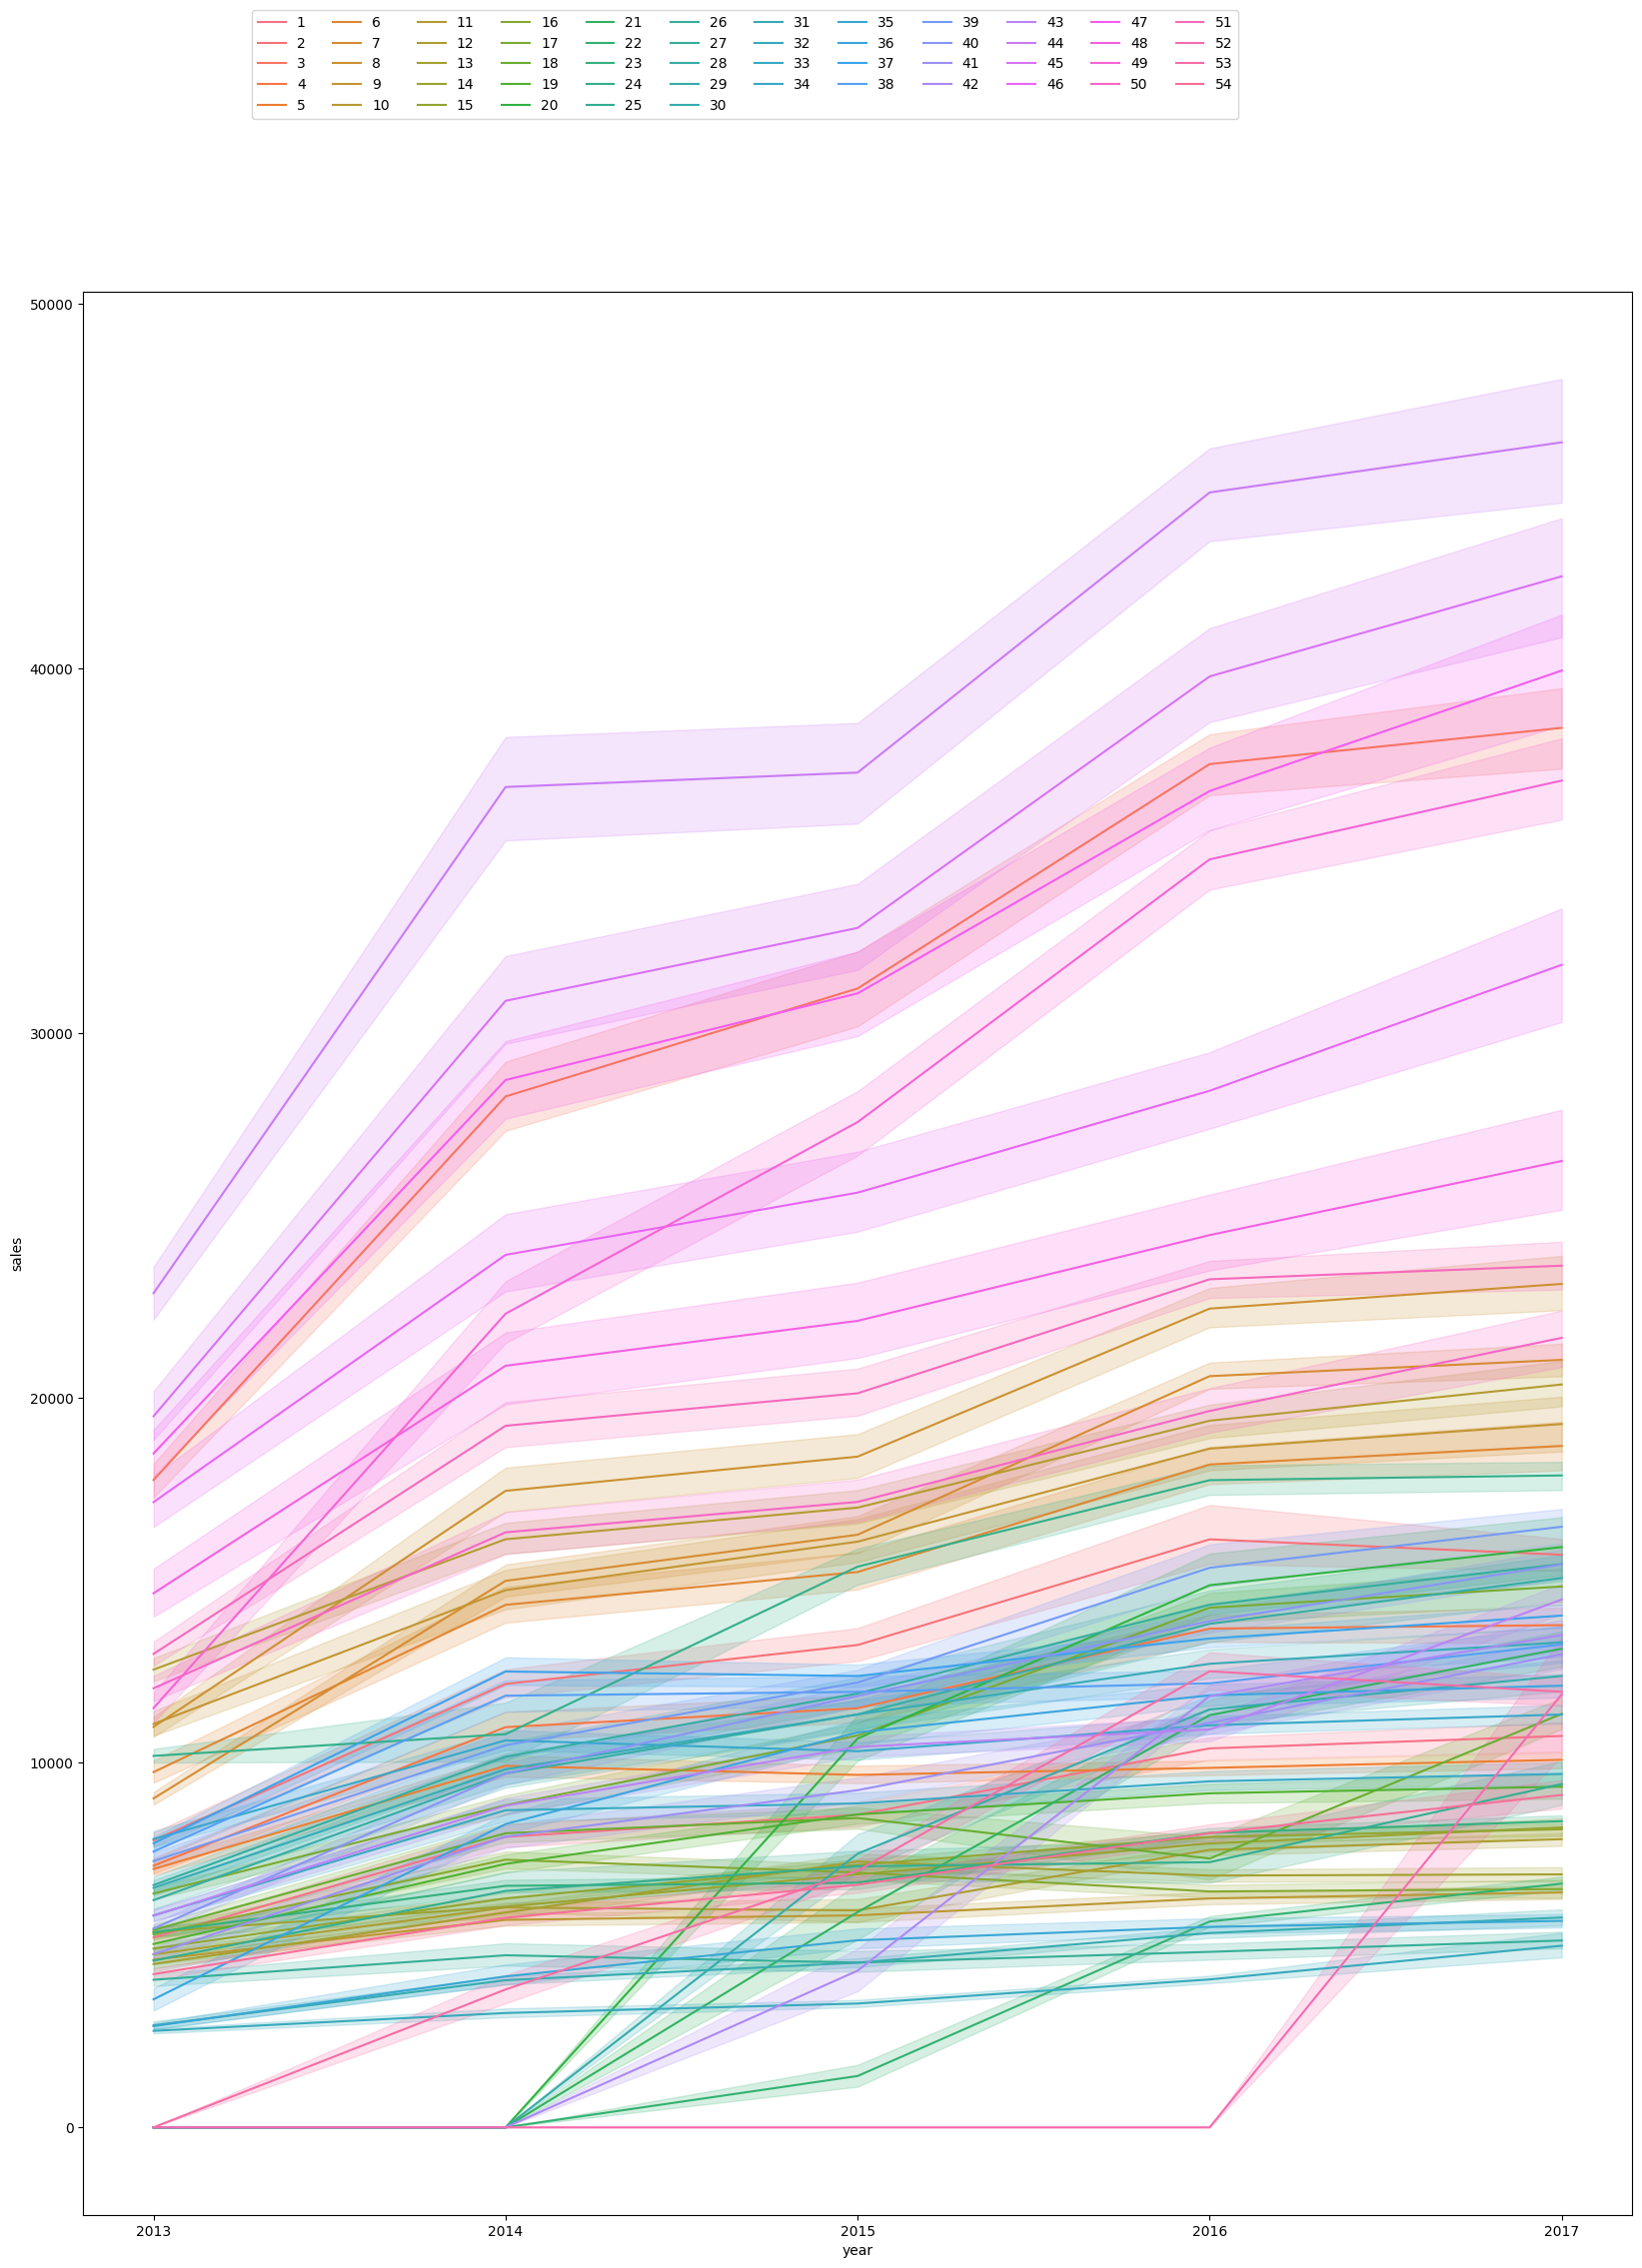

In [60]:
# family.reset_index(inplace=True)
# family['store_nbr'] = family['store_nbr'].astype(str)

plt.figure(figsize=(20, 25))
family['date'] = pd.to_datetime(family['date'])
family['year'] = family['date'].dt.year

sns.lineplot(data = family, x = 'year', y = 'sales', hue = 'store_nbr')
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=12)
plt.xticks(range(2013, 2018))


<Axes: ylabel='sales'>

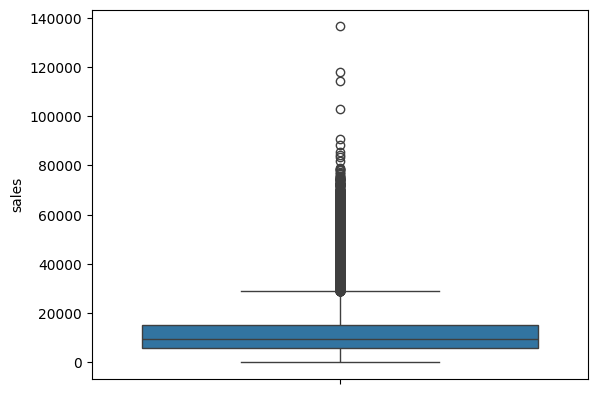

In [37]:
sns.boxplot(data = family, y = 'sales')

<Axes: ylabel='onpromotion'>

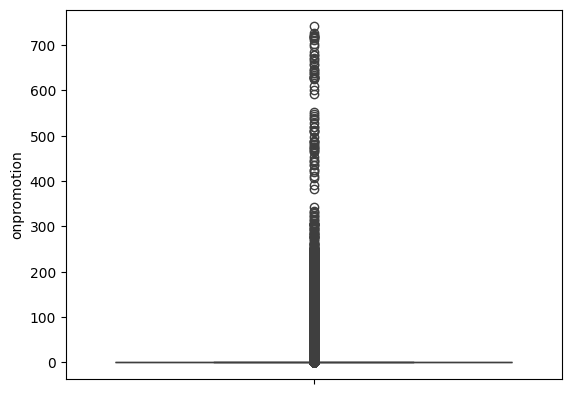

In [28]:
sns.boxplot(data = train, y = 'onpromotion')

<Axes: xlabel='onpromotion', ylabel='Count'>

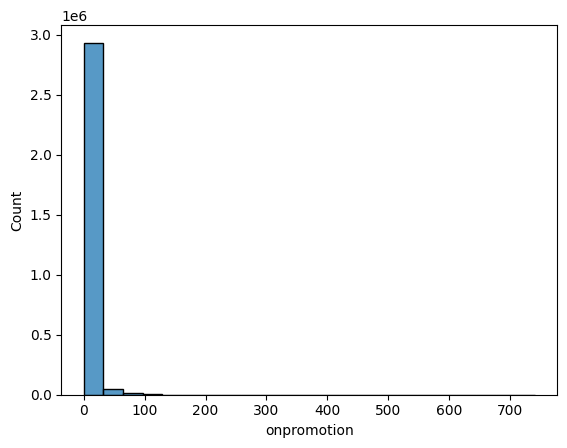

In [29]:
sns.histplot(data = train, x = 'onpromotion')

([<matplotlib.axis.XTick at 0x208b94f7ef0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017')])

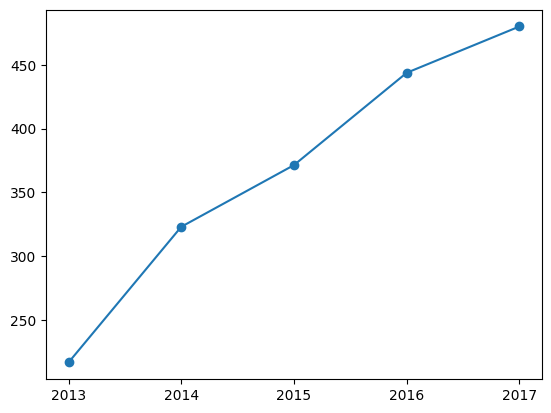

In [30]:
train['year'] = pd.DatetimeIndex(train['date']).year

yearly_data = train.groupby('year')['sales'].mean().reset_index()
plt.plot(yearly_data['year'], yearly_data['sales'], marker='o')

plt.xticks(range(2013, 2018))

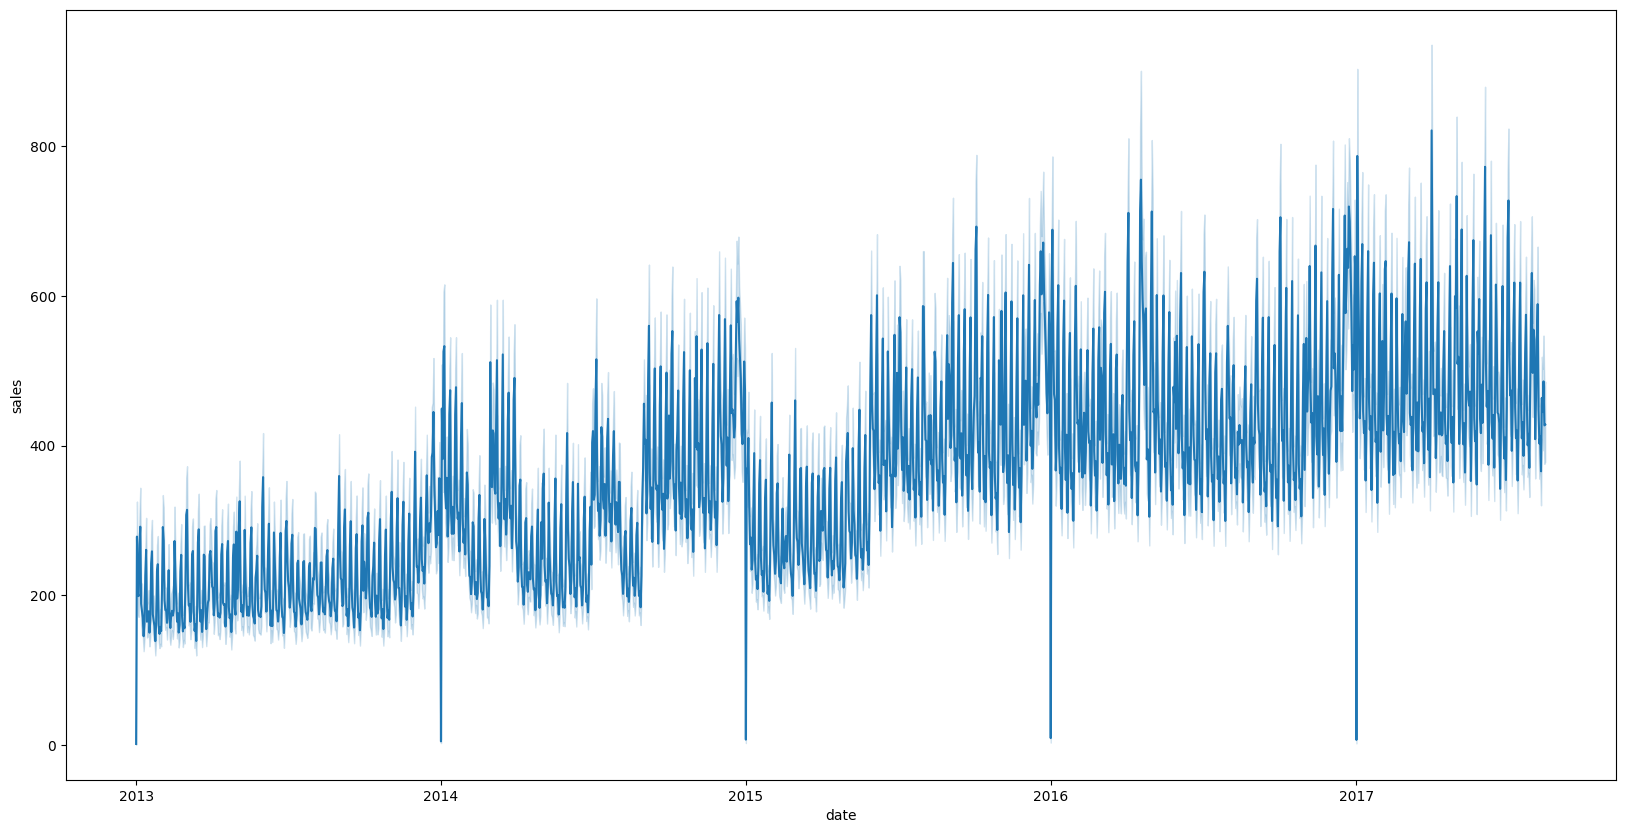

In [31]:
train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize=(20, 10))
sns.lineplot(data = train, x = 'date', y = 'sales')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

In [32]:
train['month'] = pd.DatetimeIndex(train['date']).month
train

,id,date,store_nbr,family,sales,onpromotion,year,month
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8


<Axes: xlabel='month', ylabel='sales'>

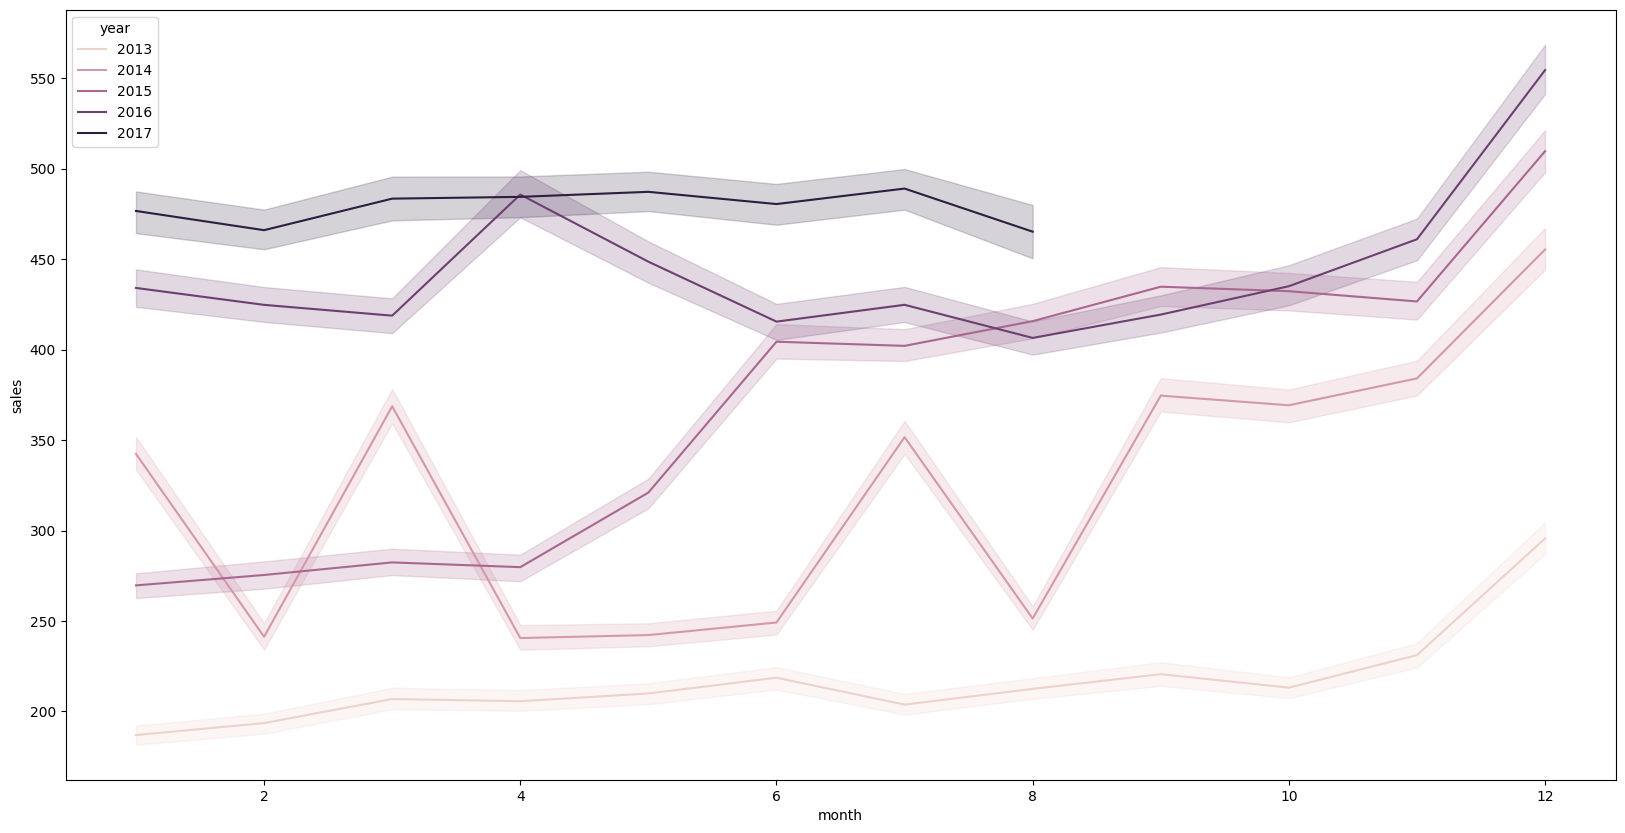

In [33]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = train, x = 'month', y = 'sales', hue = 'year')
